<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование надежности заемщиков

In [44]:
import pandas as pd
import seaborn
import warnings
warnings.filterwarnings('ignore')

## Изучение общей информации о данных

In [45]:
data = pd.read_csv('data.csv')
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [47]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — days_employed. Заполним пропуски в столбце days_employed медианными значениями по каждому типа занятости income_type. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. 

In [48]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце days_employed. 

In [49]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа days_employed в днях.

In [50]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

Выведем перечень уникальных значений столбца children.

In [51]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце children есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма.

In [52]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

### Изменение типов данных

Заменим вещественный тип данных в столбце total_income на целочисленный с помощью метода astype()

In [53]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце education. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв.

In [54]:
data['education'] = data['education'].str.lower()

In [55]:
data.duplicated().sum()

71

In [56]:
data = data.drop_duplicates()

### Категоризация данных

Создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


In [57]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [58]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца purpose.

In [59]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [60]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [61]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных

Зависимость между количеством детей и возвратом кредита в срок

In [62]:
children_pivot = data.pivot_table(index = ['children'], values = 'debt', aggfunc=['sum', 'count'])
children_pivot['percent'] = (children_pivot['sum']['debt']/children_pivot['count']['debt']*100).round(1)
children_pivot

,sum,count,percent
,debt,debt,
children,,,
0,1063,14091,7.5
1,444,4808,9.2
2,194,2052,9.5
3,27,330,8.2
4,4,41,9.8
5,0,9,0.0


По сгруппированным данным построим график отношения людей у которых есть задолженность к общему количеству людей (по каждому количеству детей отдельно) 

<AxesSubplot:ylabel="('percent', '')">

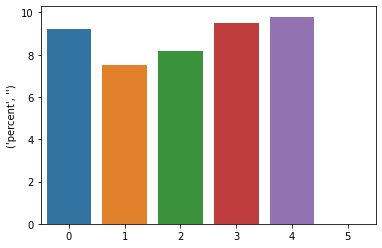

In [63]:
amount_of_children = data['children'].unique()
seaborn.barplot(data = children_pivot, x = amount_of_children, y = ('percent', ''))

**Вывод:** Родители, имеющие 1 и 2 детей возвращают кредиты в срок чаще, чем остальные. Исключение: родители имеющие 5 детей не имеют задолженность. Также стоит принять во внимание, что людей с 3 и более детьми мало, относительно всех остальных

Зависимость между семейным положением и возвратом кредита в срок

In [64]:
family_status_pivot = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc=['sum', 'count'])
family_status_pivot['percent'] = (family_status_pivot['sum']['debt']/family_status_pivot['count']['debt']*100).round(1)
family_status_pivot

,sum,count,percent
,debt,debt,
family_status,,,
Не женат / не замужем,273,2796,9.8
в разводе,84,1189,7.1
вдовец / вдова,63,951,6.6
гражданский брак,385,4134,9.3
женат / замужем,927,12261,7.6


Построим график из полученных данных

<AxesSubplot:ylabel="('percent', '')">

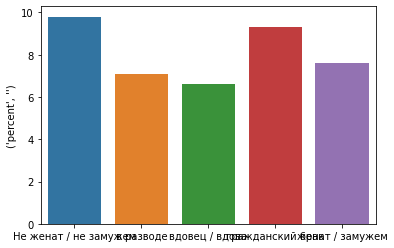

In [65]:
family_status = ['Не женат / не замужем', 'в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем']
seaborn.barplot(data = family_status_pivot, x = family_status, y = ('percent', ''))

**Вывод:** Чаще возвращают кредиты люди, которые находятся или ранее были в официальном браке. Интересно заметить, что люди, находящиеся в браки, в отличии от разведенных или овдовевщих, возвращаю кредит в срок немного реже.

Это группы: 
- в разводе (7.1%)
- вдовец/вдова (6.6%)
- женат/замужем (7.6%)

Оставшие группы возвращают кредиты в срок реже:
- не женат/не замужем (9.8%)
- в гражданском браке (9.3%)

Зависимость между уровнем дохода и возвратом кредита в срок

In [66]:
income_category = sorted(data['total_income_category'].unique())

In [67]:
income_category_pivot = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc=['sum', 'count'])
income_category_pivot['percent'] = (income_category_pivot['sum']['debt']/income_category_pivot['count']['debt']*100).round(1)
income_category_pivot

,sum,count,percent
,debt,debt,
total_income_category,,,
A,2,25,8.0
B,354,5014,7.1
C,1353,15921,8.5
D,21,349,6.0
E,2,22,9.1


Построим график из полученных данных

<AxesSubplot:ylabel="('percent', '')">

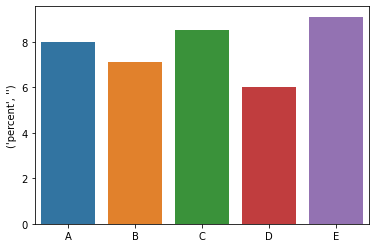

In [68]:
seaborn.barplot(data = income_category_pivot, x = income_category, y = ('percent', ''))

**Вывод:** Так как количество людей в группах A, D, E сильно меньше, чем в группах B, C сравнивать можем только последние две группы. Граждане с более высоким доходом (от 200000 до 1000000) возвращают кредит в срок чаще, чем градане с более низким доходом (от 50000 до 200000). 

Как разные цели кредита влияют на его возврат в срок

In [69]:
purpose_category = ['операции с автомобилем', 'операции с недвижимостью', 'получение образования', 'проведение свадьбы']

In [70]:
purpose_category_pivot = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc=['sum', 'count'])
purpose_category_pivot['percent'] = (purpose_category_pivot['sum']['debt']/purpose_category_pivot['count']['debt']*100).round(1)
purpose_category_pivot

,sum,count,percent
,debt,debt,
purpose_category,,,
операции с автомобилем,400,4279,9.3
операции с недвижимостью,780,10751,7.3
получение образования,369,3988,9.3
проведение свадьбы,183,2313,7.9


Построим график из полученных данных

<AxesSubplot:ylabel="('percent', '')">

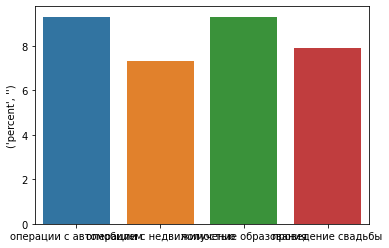

In [71]:
seaborn.barplot(data = purpose_category_pivot, x = purpose_category, y = ('percent', ''))

**Вывод:** 

Люди, взявшие кредиты на покупку недвижимости и проведение свадьбы имеют долг реже (в 7.3% случаях и в 8% случаях соответственно).

Люди, взявщие кредиты на покупку автомобиля или получения образования имеют долг чаще (в 9.3% случаях).

## Общий вывод
В каждой иследованной группе люди имеют задолженность по возврату кредита не более, чем в 10% случаях и не менее, чем в 5% случаях. 

1. Зависимость между количеством детей и возвратом кредита в срок показывает, что чаще всего кредиты возвращают в срок родители с 1, 2 или 5 детьми, реже всего родители с 4 детьми:
- 0 детей: 7.5%
- 1 ребенок: 9.2%
- 2 ребенка: 9.5%
- 3 ребенка: 8.2%
- 4 ребенка: 9.8%
- 5 детей: 0%

2. Зависимость между семейным положением и возвратом кредита в срок показывает, что чаще возвращают кредиты люди, которые находятся или ранее были в официальном браке. Оставшие группы возвращают кредиты в срок реже.
- в разводе: 7.1%
- вдовец/вдова: 6.6%
- женат/замужем: 7.6%
- не женат/не замужем: 9.8%
- в гражданском браке: 9.3%

3. Зависимость между уровнем дохода и возвратом кредита в срок показывает, что люди из группы E с доходом менее 30000 чаще других имеют задолженности, люди из группы E имеющие доход немного выше (от 30000 до 50000) возвращают кредиты гораздо чаще, чем любая другая группа. 
- 0–30000 — 'E': 9.1%
- 30001–50000 — 'D': 6%
- 50001–200000 — 'C': 8.5%
- 200001–1000000 — 'B': 7.1%
- 1000001 и выше — 'A': 8%

4. Зависимость между целью кредита и возвратом кредита в срок показывает, что люди, взявшие кредиты на покупку недвижимости и проведение свадьбы имеют долг реже, а люди, взявщие кредиты на покупку автомобиля или получения образования имеют долг чаще.
- операции с недвижимостью: 7.3%
- проведение свадьбы: 7.9%
- операции с автомобилем: 9.3%
- получение образования: 9.3%